In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
# Load the data and check the first few lines
dataset_path = "preprocessed_data_with_num.csv" # use your own path

dataset = pd.read_csv(dataset_path)
dataset.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset,title_length,location_length,department_length,company_profile_length,description_length,requirements_length,missing company profile,missing_combination,missing_combination_Both profile and logo Missing,missing_combination_Both profile and logo Present,missing_combination_Missing Logo Only,missing_combination_Missing Profile Only,full_text_length
0,marketing intern,usa ny new york,marketing,food52 created groundbreaking award winning co...,food52 fast growing james beard award winning ...,experience content management system major plu...,NaN,0,1,0,2,4,9,NaN,marketing,0,0,16,17,9,888,908,862,0,Both profile and logo Present,0,1,0,0,2700
1,customer service cloud video production,nz auckland,success,90 second world cloud video production service...,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,get u part 90 second team gain experience work...,0,1,0,1,6,9,marketing advertising,customer service,0,0,41,14,7,1289,2072,1439,0,Both profile and logo Present,0,1,0,0,4862
2,commissioning machinery assistant cma,usa ia wever,NaN,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,NaN,0,1,0,2,6,9,NaN,NaN,0,0,39,14,0,875,355,1377,0,Both profile and logo Present,0,1,0,0,2660
3,account executive washington dc,usa dc washington,sale,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporate collaborative creat...,0,1,0,1,5,1,computer software,sale,0,0,33,19,5,613,2617,1444,0,Both profile and logo Present,0,1,0,0,4731
4,bill review manager,usa fl fort worth,NaN,spotsource solution llc global human capital m...,job title itemization review manager location ...,qualification rn license state texas diploma b...,full benefit offered,0,1,1,1,5,1,hospital health care,health care provider,0,0,19,19,0,1632,1445,769,0,Both profile and logo Present,0,1,0,0,3884


In [3]:
# drop duplicates
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [4]:
dataset.fillna('', inplace=True)

In [5]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [6]:
x = dataset.drop(['fraudulent', 'in_balanced_dataset' ] , axis = 1)
y = dataset['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)


In [7]:
train_set = x_train.copy()
train_set['fraudulent'] = y_train

                                                   telecommuting  \
telecommuting                                           1.000000   
has_company_logo                                       -0.026702   
has_questions                                           0.026036   
employment_type                                        -0.028833   
required_experience                                    -0.020900   
required_education                                      0.011983   
title_length                                            0.009334   
location_length                                        -0.049920   
department_length                                       0.020441   
company_profile_length                                 -0.021532   
description_length                                      0.006120   
requirements_length                                     0.022210   
missing company profile                                 0.070971   
missing_combination_Both profile and logo Missin

<AxesSubplot:>

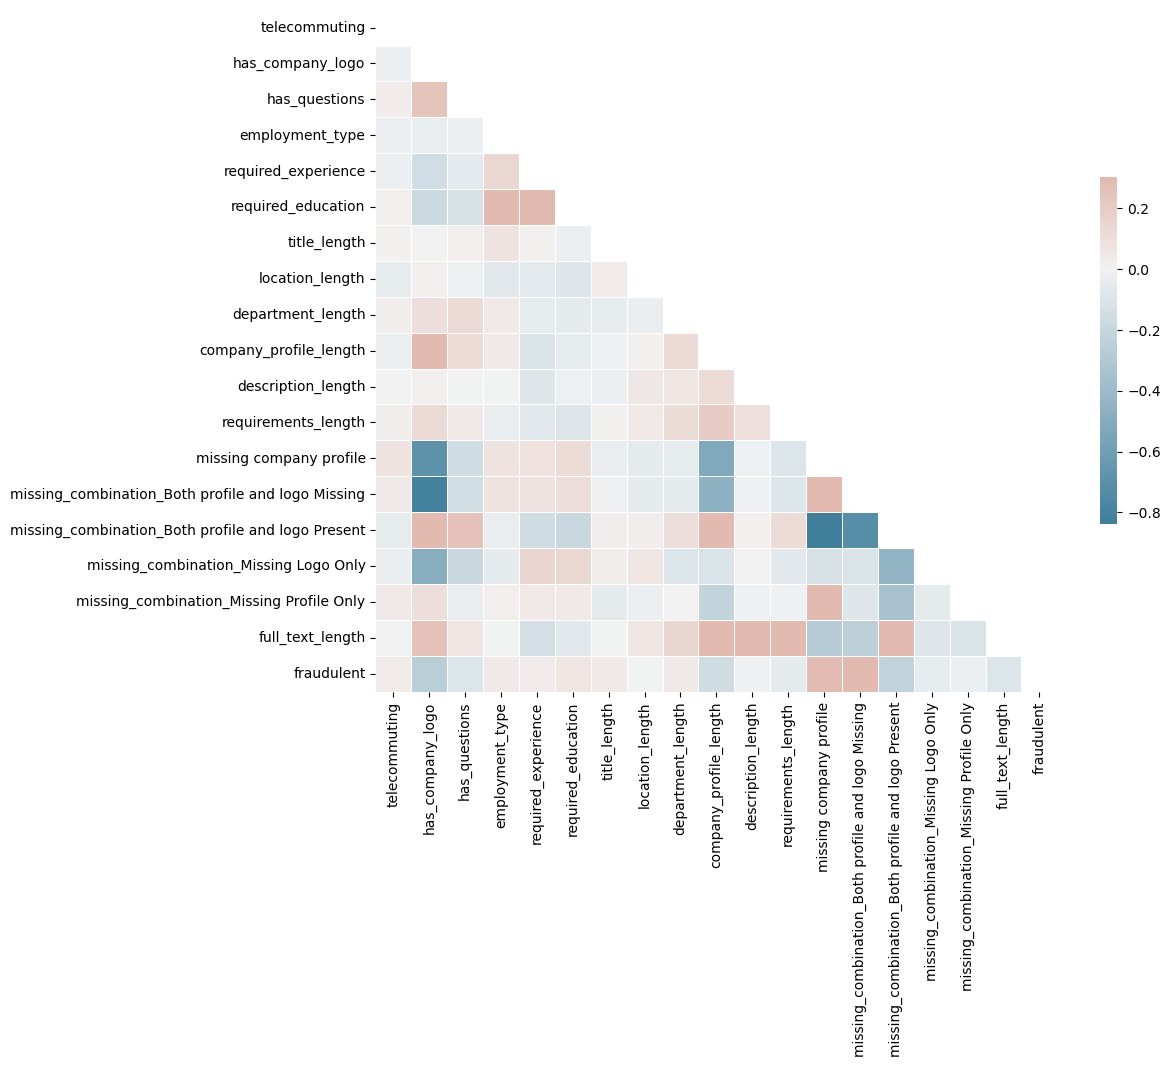

In [8]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
corr['fraudulent']

telecommuting                                        0.036045
has_company_logo                                    -0.259369
has_questions                                       -0.094452
employment_type                                      0.044544
required_experience                                  0.031902
required_education                                   0.056089
title_length                                         0.041257
location_length                                     -0.005823
department_length                                    0.043759
company_profile_length                              -0.159914
description_length                                  -0.008313
requirements_length                                 -0.054586
missing company profile                              0.286562
missing_combination_Both profile and logo Missing    0.328806
missing_combination_Both profile and logo Present   -0.232467
missing_combination_Missing Logo Only               -0.048662
missing_

consider take out "missing_combination_Missing Logo Only" "missing_combination_Missing Profile Only" from the missing company information part

In [10]:
num_features = x_train.loc[:, ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing company profile',
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only', 'full_text_length', 'title_length', 'location_length', 'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.52791999e+01, 1.72688314e+02, 5.56769448e+01, 1.03901278e+01,
       1.42395091e+01, 8.82176356e+01, 8.18714225e+02, 1.13021930e+03,
       1.64878257e+02, 2.73336058e+01, 7.82925475e+00, 8.38025540e+04,
       1.39420670e+02, 7.20577898e-01, 2.85188225e+02, 1.62102150e+05,
       5.33023380e+02, 2.30391210e+04]), array([9.27320241e-005, 1.91442422e-039, 8.54141477e-014, 1.26690855e-003,
       1.60955529e-004, 5.86348045e-021, 4.60585127e-180, 8.93250011e-248,
       9.72533620e-038, 1.71209854e-007, 5.14072913e-003, 0.00000000e+000,
       3.56370472e-032, 3.95954414e-001, 5.55940455e-064, 0.00000000e+000,
       6.21154591e-118, 0.00000000e+000]))
location_length                                       3.959544e-01
missing_combination_Missing Profile Only              5.140729e-03
employment_type                                       1.266909e-03
required_experience                                   1.609555e-04
telecommuting                                         9.273202e

<AxesSubplot:>

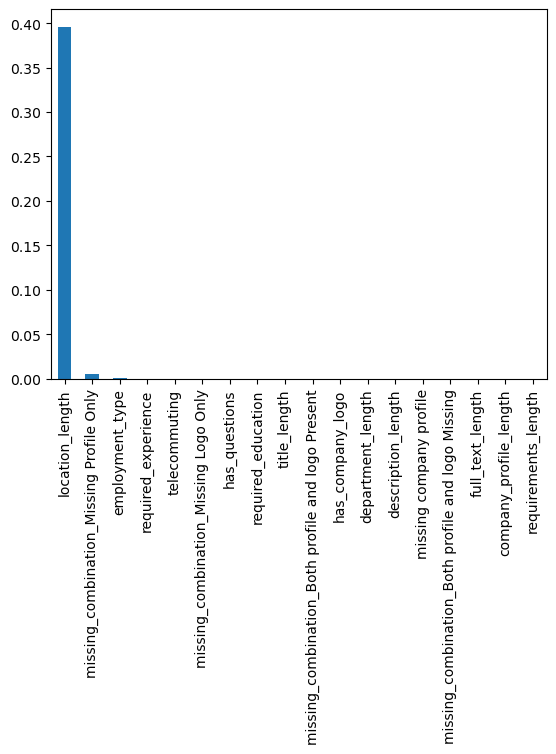

In [11]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


'location_length' has p_value 0.4 -- unable to reject H0 that it is independent from the target variable

telecommuting                                        0.000000
has_company_logo                                     0.026724
has_questions                                        0.004797
employment_type                                      0.003229
required_experience                                  0.002919
required_education                                   0.011513
missing company profile                              0.027935
missing_combination_Both profile and logo Missing    0.038054
missing_combination_Both profile and logo Present    0.025406
missing_combination_Missing Logo Only                0.002525
missing_combination_Missing Profile Only             0.000000
full_text_length                                     0.029087
title_length                                         0.008749
location_length                                      0.011246
department_length                                    0.006478
company_profile_length                               0.082255
descript

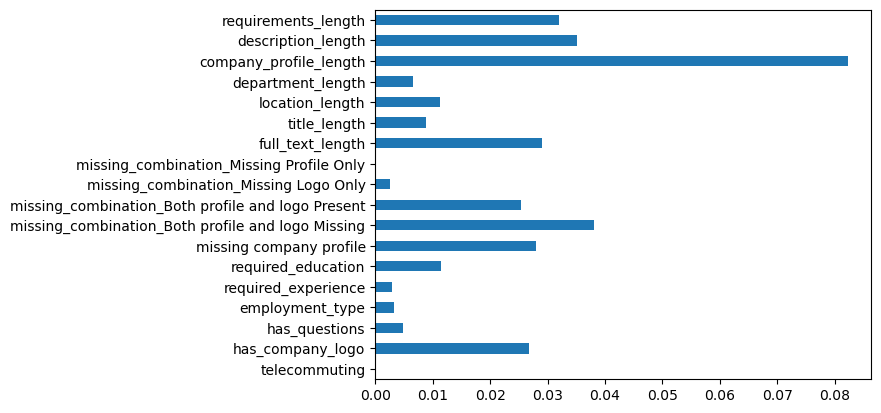

In [12]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG

Therefore, we decided to remove 'location_length' as it does not provide much information gain and more importantly, based on the chi-sqaure test, it shows independency with the target variable.

# logistic regression

In [13]:
# remove 'location_length', 'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only'
x_train_selected = x_train.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

x_test_selected = x_test.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = LogisticRegression()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    # y_pred = model.predict(to_pred)

    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression() _ Train Details,88,33,23,62
LogisticRegression() _ Test Details,88,34,24,57


# random forest and decision tree

In [15]:
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = DecisionTreeClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    # y_pred = model.predict(to_pred)

    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
DecisionTreeClassifier() _ Train Details,100,100,100,100
DecisionTreeClassifier() _ Test Details,96,60,59,61


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = RandomForestClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    # y_pred = model.predict(to_pred)

    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
RandomForestClassifier() _ Train Details,98,84,73,100
RandomForestClassifier() _ Test Details,93,55,41,85


# SVC/SVM -- quite poor performance of model (tend to predict everything as non-fraud)

In [17]:

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = SVC(probability= True)
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)


    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
SVC(probability=True) _ Train Details,95,1,75,1
SVC(probability=True) _ Test Details,95,1,50,0


# Gradient boosting 


In [18]:
# a simple grid search to find better parameters

# list_of_models = []
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=1.5))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=600, learning_rate=1.5))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=2))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=600, learning_rate=2))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=0.1))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=600, learning_rate=0.1))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=1.9))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=600, learning_rate=1.9))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=1.1))
# list_of_models.append(GradientBoostingClassifier(random_state=42, n_estimators=600, learning_rate=1.1))


In [19]:

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = GradientBoostingClassifier(random_state=42, n_estimators=500, learning_rate=1.1)
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)


    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
"GradientBoostingClassifier(learning_rate=1.1, n_estimators=500, random_state=42) _ Train Details",93,55,39,93
"GradientBoostingClassifier(learning_rate=1.1, n_estimators=500, random_state=42) _ Test Details",92,53,39,81


# gradient boosting's specific implementation: XGboosting classifier

In [20]:
# !pip install xgboost
from xgboost import XGBClassifier



classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = XGBClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)


    acc = round(accuracy_score(pred , y_pred)*100)
    f1 = round(f1_score(pred , y_pred)*100)
    prec = round(precision_score(pred , y_pred)*100)
    recall = round(recall_score(pred , y_pred)*100)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Train Details",98,79,66,100
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Test Details",95,64,54,77
